In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import loaders
import ML
from sklearn.metrics import roc_auc_score

In [ ]:
e,g,h = loaders.load_it_all(age=False, sex=False, split_enigma=False, i_keys=None, scale=True)

In [ ]:
ML.run_binary_search(e[0][mask], e[1][mask], n_splits=3, n_repeats=5, int_folds=3, param_comb=100, verbose=True, classifier='log')

In [ ]:
ML.run_binary_search(e[0][mask], e[1][mask], n_splits=3, n_repeats=5, int_folds=3, param_comb=100, verbose=True, classifier='SGD')

In [ ]:
ML.run_binary_search(e[0][mask], e[1][mask], n_splits=3, n_repeats=5, int_folds=3, param_comb=100, verbose=True, classifier='SVM')

In [ ]:
scores = []
model = ML.train_model(e[0][~np.array(mask3)], e[1][~np.array(mask3)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask3], e[1][mask3])
scores.append(score)

model = ML.train_model(e[0][~np.array(mask5)], e[1][~np.array(mask5)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask5], e[1][mask5])
scores.append(score)

model = ML.train_model(e[0][~np.array(mask6)], e[1][~np.array(mask6)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask6], e[1][mask6])
scores.append(score)

model = ML.train_model(e[0][~np.array(mask7)], e[1][~np.array(mask7)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask7], e[1][mask7])
scores.append(score)

model = ML.train_model(e[0][~np.array(mask9)], e[1][~np.array(mask9)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask9], e[1][mask9])
scores.append(score)


print(np.mean(scores))
print(np.std(scores))

In [ ]:
scores = []
model = ML.train_model(e[0][np.array(mask) ^np.array(mask3)], e[1][np.array(mask) ^np.array(mask3)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask3], e[1][mask3])
scores.append(score)

model = ML.train_model(e[0][np.array(mask) ^np.array(mask5)], e[1][np.array(mask) ^np.array(mask5)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask5], e[1][mask5])
scores.append(score)

model = ML.train_model(e[0][np.array(mask) ^np.array(mask6)], e[1][np.array(mask) ^np.array(mask6)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask6], e[1][mask6])
scores.append(score)

model = ML.train_model(e[0][np.array(mask) ^np.array(mask7)], e[1][np.array(mask) ^np.array(mask7)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask7], e[1][mask7])
scores.append(score)

model = ML.train_model(e[0][np.array(mask) ^np.array(mask9)], e[1][np.array(mask) ^np.array(mask9)], classifier='SVM', param_comb=100, int_folds=3)
score = ML.get_roc(model, e[0][mask9], e[1][mask9])
scores.append(score)


print(np.mean(scores))
print(np.std(scores))

Load plot raw data

In [4]:
ref_data = pd.read_csv('germans.csv')
ref = list(ref_data)
del ref[-1]

data = pd.read_excel('enigma_raw.xlsx')
controls = pd.read_excel('controlz.xlsx')
data = loaders.proc_raw_enigma(ref,data)
controls = loaders.proc_raw_enigma(ref, controls, control=True)

german = loaders.load_raw_german()

In [5]:
hcp = loaders.load_raw_hcp()

hcp_controls = hcp[(hcp['Binge_1+_Weekly'] == 0) & (hcp['SSAGA_Alc_D4_Ab_Dx'] == 0) & (hcp['Violates_DPW_guidelines'] == 0) & (hcp['SSAGA_Alc_D4_Dp_Dx'] ==0)]
hcp_controls = hcp_controls.drop(['Violates_DPW_guidelines', 'Binge_1+_Weekly', 'SSAGA_Alc_D4_Ab_Dx', 'SSAGA_Alc_D4_Dp_Dx'], axis=1)
hcp_controls['Site'] = 70
hcp_controls['Alc'] = 0
hcp_controls = hcp_controls.rename({'Gender' : 'Sex'}, axis=1)

hcp = hcp.drop(['Violates_DPW_guidelines', 'Binge_1+_Weekly', 'SSAGA_Alc_D4_Ab_Dx'], axis=1)
hcp = hcp.rename({'SSAGA_Alc_D4_Dp_Dx' : 'Alc', 'Gender' : 'Sex'}, axis=1)
hcp['Site'] = 70

In [6]:
all_data = pd.concat([data, controls, german, hcp_controls])
all_data = all_data.drop_duplicates()

/home/sage/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
sites = np.unique(all_data.Site)

thick_measures = [t for t in list(all_data) if 'thickavg' in t]
surf_measures = [t for t in list(all_data) if 'surfavg' in t]

s_cort_names = set(['accumb', 'amyg', 'caud', 'hippo', 'pal', 'put', 'thal'])
s_cort_vol_measures = [t for t in list(all_data) if t[1:] in s_cort_names]

all_data['Thick'] = np.sum(all_data[thick_measures], axis=1)
all_data['Surf'] = np.sum(all_data[surf_measures], axis=1)
all_data['S_cort'] = np.sum(all_data[s_cort_vol_measures], axis=1)

In [8]:
site_lens = [len(all_data[all_data.Site == i]) for i in sites]
inds = list(range(len(sites)))

In [10]:
all_data.shape

(2691, 158)

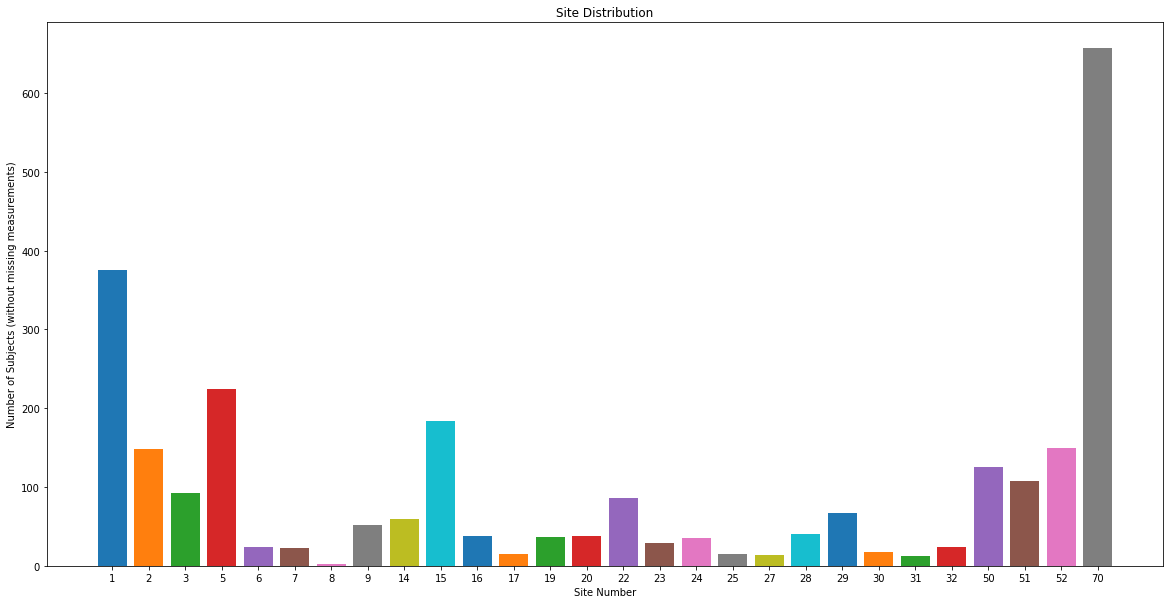

In [9]:
plt.figure(figsize=(20,10))

for i in inds:
    plt.bar(i, site_lens[i])
    
plt.xticks(inds, sites)
plt.xlabel('Site Number')
plt.ylabel('Number of Subjects (without missing measurements)')
plt.title('Site Distribution')
plt.savefig('SiteDistribution.jpg')
plt.show()

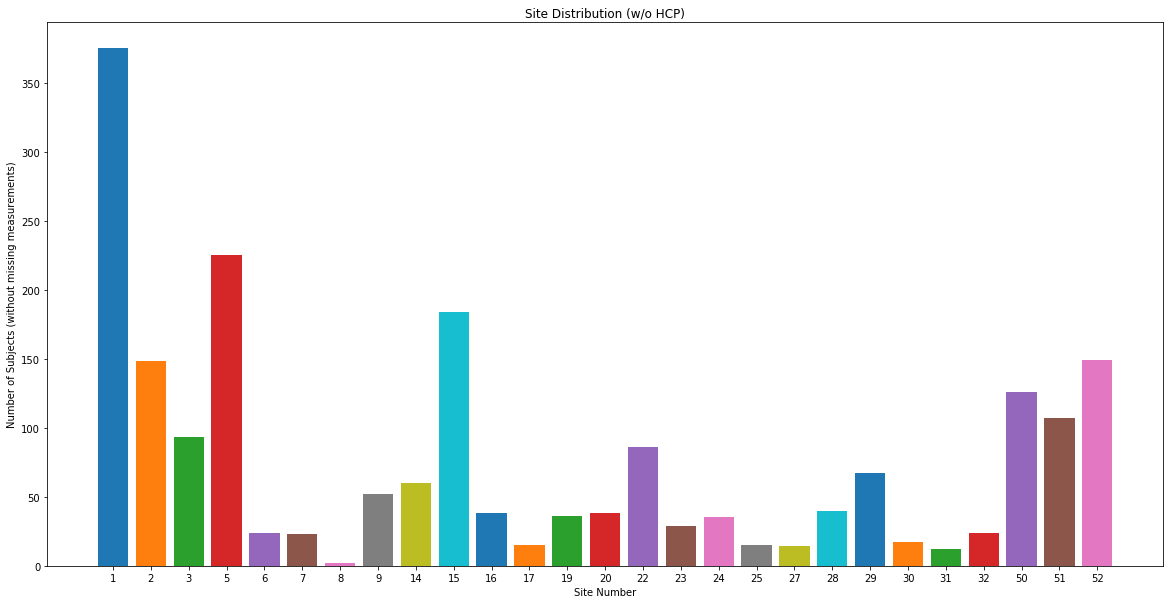

In [10]:
plt.figure(figsize=(20,10))

for i in inds[:-1]:
    plt.bar(i, site_lens[i])
    
plt.xticks(inds[:-1], sites[:-1])
plt.xlabel('Site Number')
plt.ylabel('Number of Subjects (without missing measurements)')
plt.title('Site Distribution (w/o HCP)')
plt.savefig('SiteDistribution-minusHCP.jpg')
plt.show()

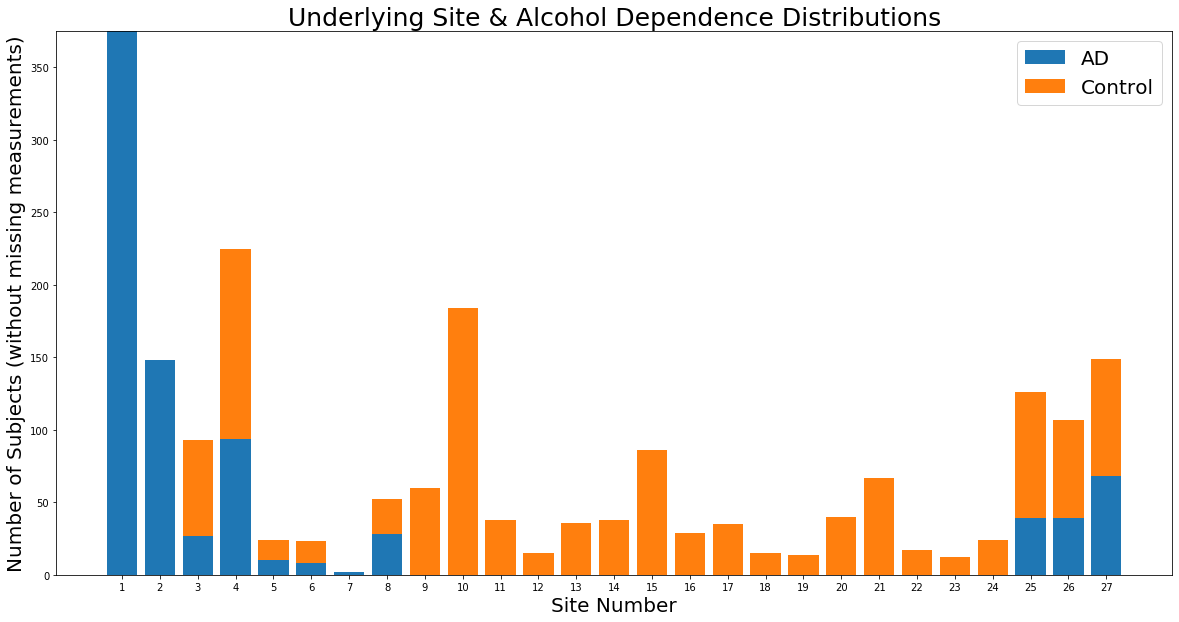

In [9]:
alc_count = [len(all_data[(all_data.Site == i) & (all_data.Alc == 1)]) for i in sites]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

ax.bar(np.array(inds[:-1])+1, alc_count[:-1], label='AD')
ax.bar(np.array(inds[:-1])+1, np.array(site_lens[:-1]) - np.array(alc_count[:-1]), bottom=alc_count[:-1], label='Control')
    
ax.set_xticks(np.array(inds[:-1])+1)
ax.set_xlabel('Site Number', fontsize=20)
ax.set_ylabel('Number of Subjects (without missing measurements)', fontsize=20)
ax.set_title('Underlying Site & Alcohol Dependence Distributions', fontsize=25)
ax.legend(fontsize=20)
plt.savefig('AlcDistribution.pdf', dpi=1000, transparent=False)
plt.show()

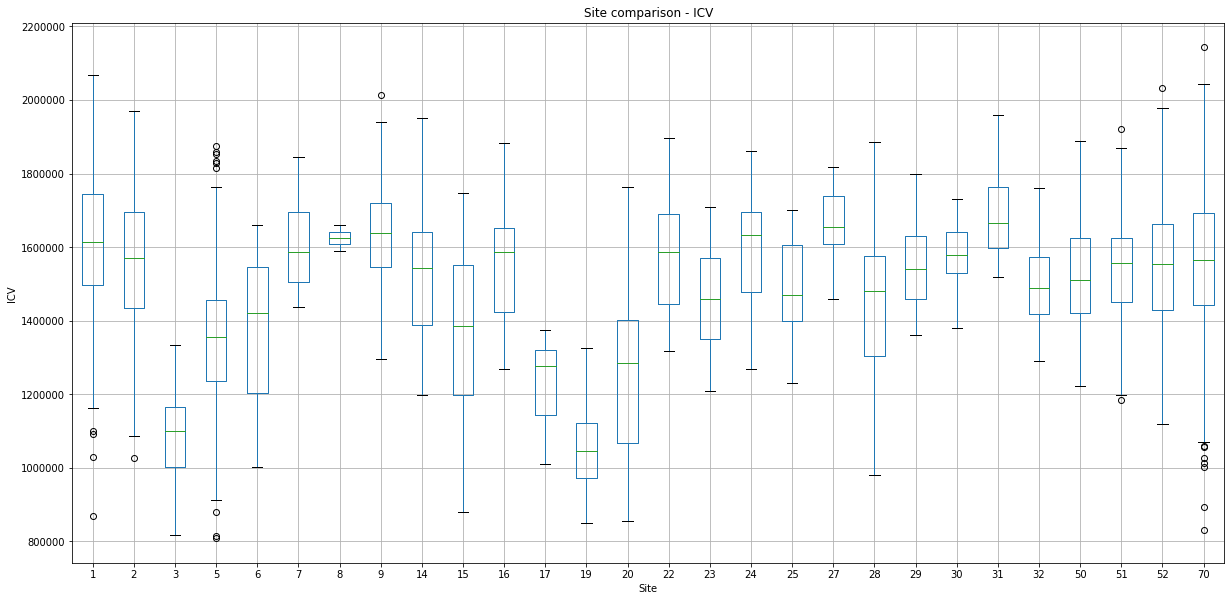

In [13]:
ax = all_data.boxplot(column = ['ICV'], by='Site', figsize = (20,10))
ax.set_ylabel('ICV')
plt.suptitle("")
ax.set_title('Site comparison - ICV')
plt.savefig('ICVbySite.jpg')
plt.show()

In [ ]:
ax = all_data.boxplot(column = ['Thick'], by='Site', figsize = (20,10))
ax.set_ylabel('Sum of Avg. Thickness')
plt.suptitle("")
ax.set_title('Site comparison - by sum of cortical thickness')
plt.savefig('ThickbySite.jpg')
plt.show()

In [ ]:
ax = all_data.boxplot(column = ['Surf'], by='Site', figsize = (20,10))
ax.set_ylabel('Sum of Surface')
plt.suptitle("")
ax.set_title('Site comparison - by sum of cortical surface')
plt.savefig('SurfbySite.jpg')
plt.show()

In [ ]:
ax = all_data.boxplot(column = ['S_cort'], by='Site', figsize = (20,10))
ax.set_ylabel('Sum of Sub-cortical volume')
plt.suptitle("")
ax.set_title('Site comparison - by sum of sub-cortical volume')
plt.savefig('SubcorticalVolumebySite.jpg')
plt.show()

In [ ]:
all_data.to_csv('All_Data_HCP_Controls.csv')